In [5]:
import lime
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import numpy as np
%matplotlib inline

## Repeat whole procedures in [Lime - basic usage, two class case](https://github.com/marcotcr/lime/blob/master/doc/notebooks/Lime%20-%20basic%20usage%2C%20two%20class%20case.ipynb)

In [34]:
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
class_names = ['atheism', 'christian']

vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train_vectors, newsgroups_train.target)

pred = rf.predict(test_vectors)
c = make_pipeline(vectorizer, rf)


## Repeat running the same LIME explanations on the same input multiple times

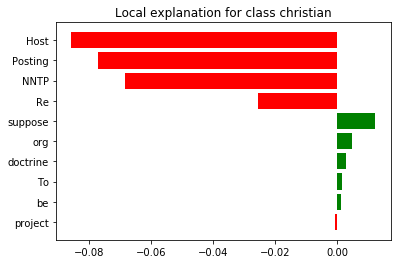

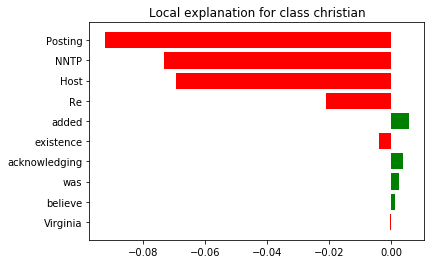

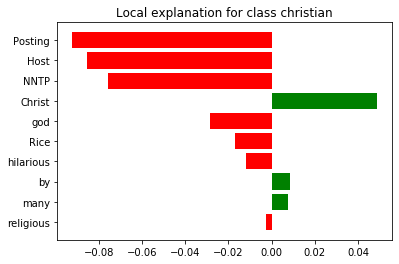

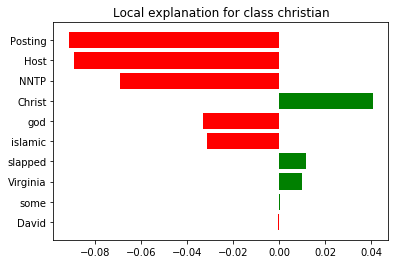

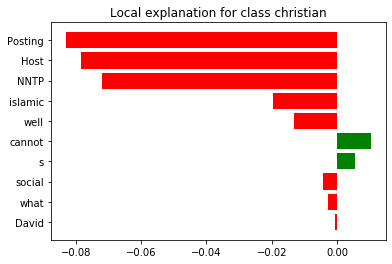

In [57]:
idx = 679
for i in range(5):
    explainer = LimeTextExplainer(class_names=class_names,random_state=i)
    exp = explainer.explain_instance(newsgroups_test.data[idx], c.predict_proba, num_features=10,num_samples=200)
    fig = exp.as_pyplot_figure()